#Image Captioning by Hugging Face Model


In [ ]:
!pip install transformers==4.35.0
!pip install quanto==0.0.11
!pip install torch==2.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.

In [ ]:
import requests
from PIL import Image
from transformers import AutoProcessor, BlipForConditionalGeneration
import helper

In [ ]:
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

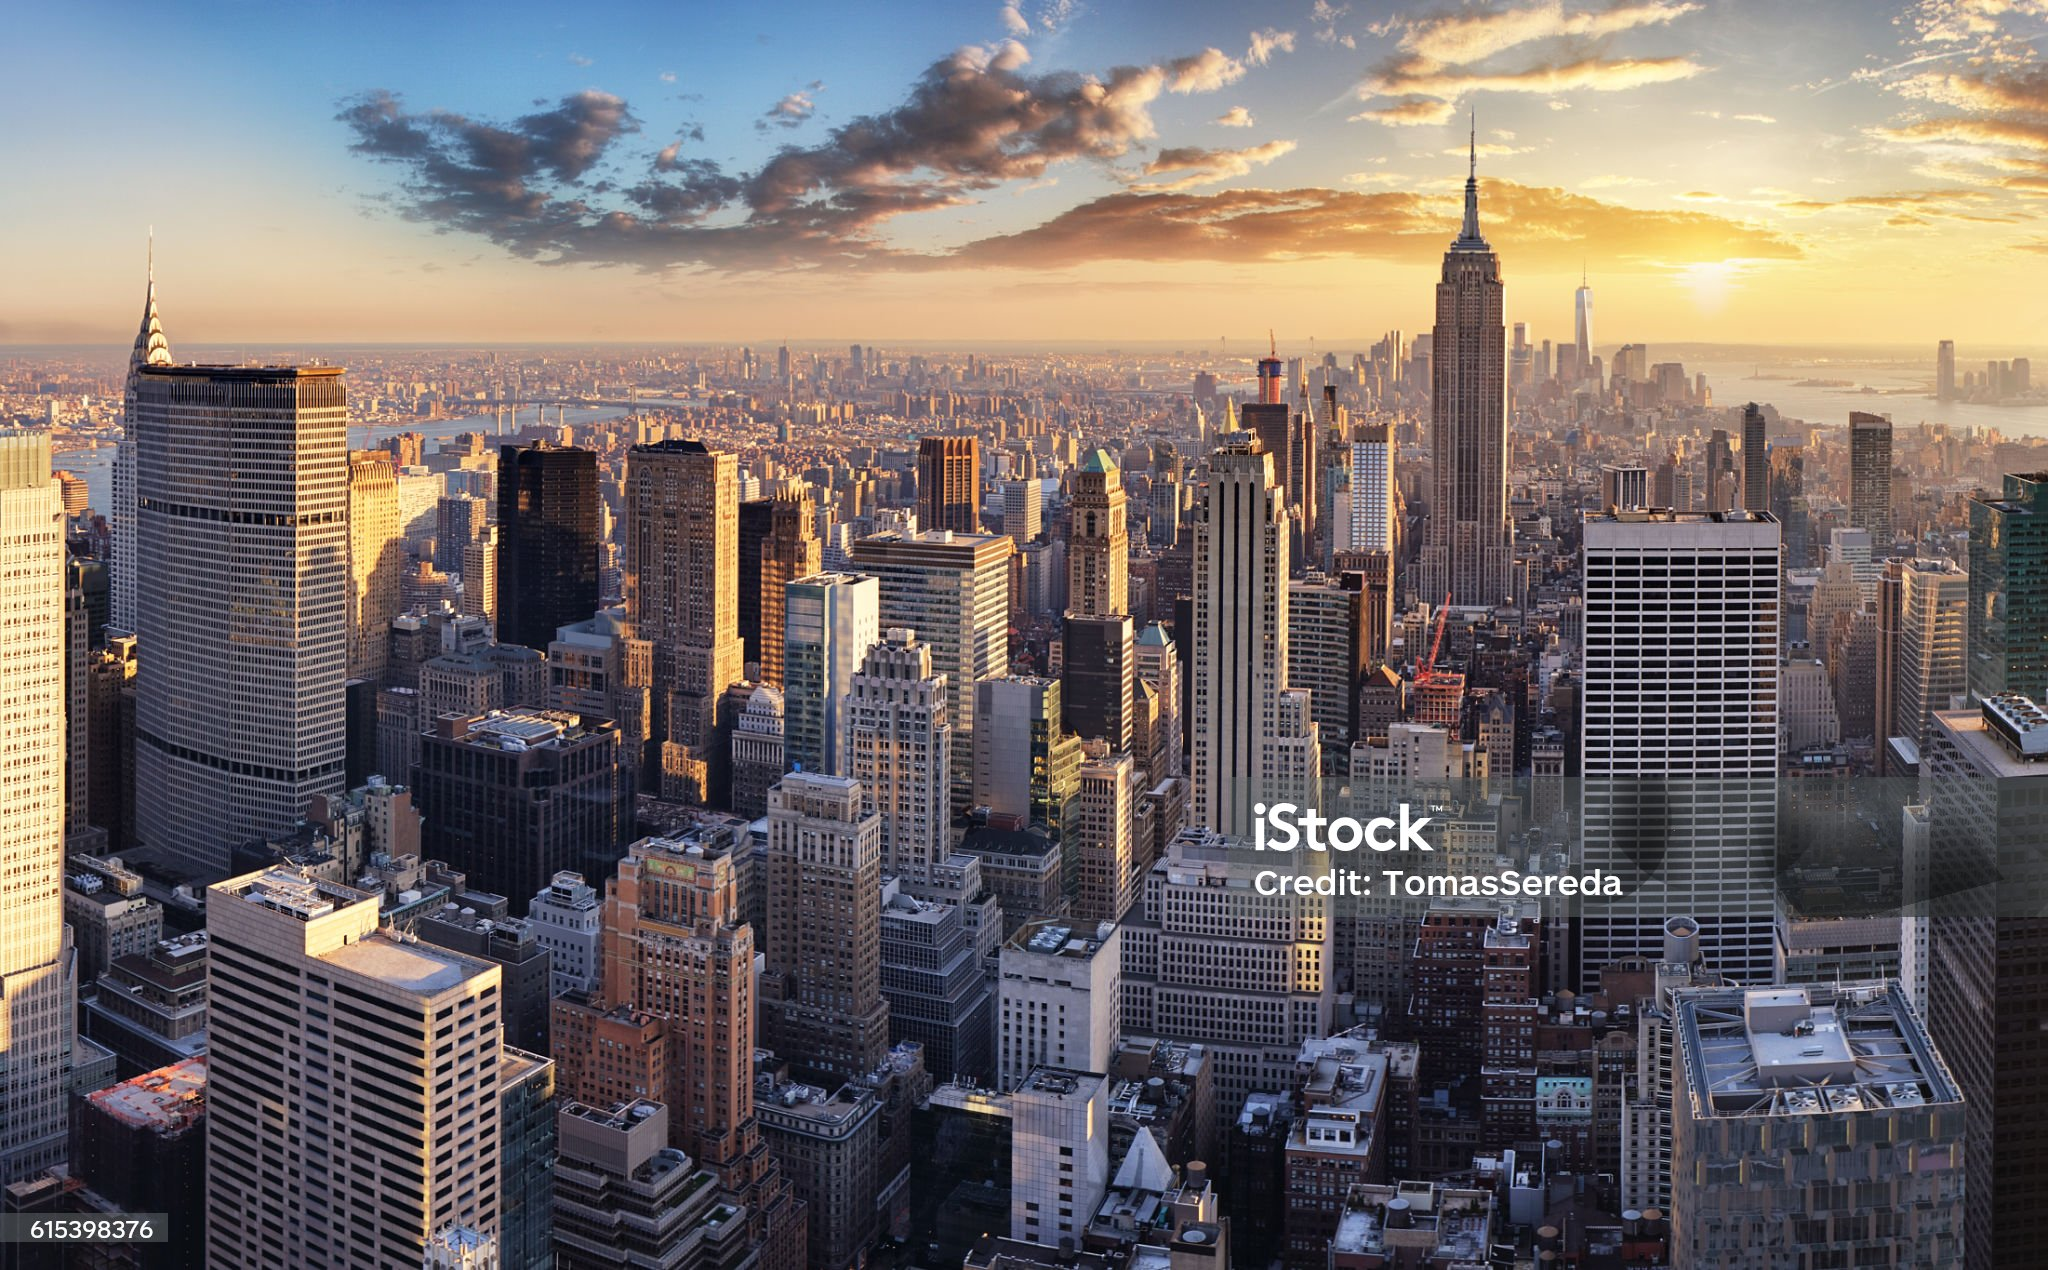

In [ ]:
img_url = 'https://media.istockphoto.com/id/615398376/photo/new-york-city-nyc-usa.jpg?s=2048x2048&w=is&k=20&c=kGWBwUV37-YTNvgKRS0m0zHSwJ4xLmdg9eQaFRhmYoE='
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

In [ ]:
# conditional image captioning
text = "a photo of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photo of a city skyline with a sunset in the background


In [ ]:
# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


arafed view of a city with skyscrapers and a sunset


In [ ]:
import torch
import os

In [ ]:
def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size=os.path.getsize("temp.p")
    print("model: ",label,' \t','Size (MB):', size/1e6)
    os.remove('temp.p')
    return size

print_size_of_model(model, "Original model Size")

model:  Original model Size  	 Size (MB): 1879.139486


1879139486

In [ ]:
from quanto import quantize, freeze


In [ ]:
quantize(model, weights=torch.int8, activations=None)

In [ ]:
print(model)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-23): 24 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): QLinear(in_features=1024, out_features=3072, bias=True)
            (projection): QLinear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): QLinear(in_features=1024, out_features=4096, bias=True)
            (fc2): QLinear(in_features=4096, out_features=1024, bias=True)
          )
          (layer_norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((102

In [ ]:
freeze(model)

In [ ]:
print_size_of_model(model, "Quantized model Size")

model:  Quantized model Size  	 Size (MB): 548.99485


548994850

In [ ]:
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

arafed view of a city with skyscrapers and a sunset


In [ ]:
text = "a photo of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a photo of a city skyline with skyscrapers and a sunset


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tokenizers 0.14.1 requires huggingface_hub<0.18,>=0.16.4, but you have huggingface-hub 0.22.2 which is incompatible.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("jamescalam/image-text-demo", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from torch.utils.data import Dataset, DataLoader

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["text"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [ ]:
from transformers import AutoProcessor, BlipForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

In [ ]:
train_dataset = ImageCaptioningDataset(dataset, processor)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=2)

In [ ]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(50):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Loss: 10.261322975158691
Loss: 10.202168464660645
Loss: 10.04693603515625
Loss: 9.856760025024414
Loss: 9.740903854370117
Loss: 9.347851753234863
Loss: 8.998200416564941
Loss: 8.903840065002441
Loss: 8.772586822509766
Loss: 8.574577331542969
Loss: 8.41604995727539
Epoch: 1
Loss: 8.257146835327148
Loss: 8.056462287902832
Loss: 7.878658294677734
Loss: 7.756796360015869
Loss: 7.62321662902832
Loss: 7.500848293304443
Loss: 7.332188606262207
Loss: 7.222750663757324
Loss: 7.10495138168335
Loss: 6.976016044616699
Loss: 6.8315110206604
Epoch: 2
Loss: 6.721811294555664
Loss: 6.560223579406738
Loss: 6.455992698669434
Loss: 6.324339866638184
Loss: 6.196320533752441
Loss: 6.046389579772949
Loss: 5.9359259605407715
Loss: 5.814418315887451
Loss: 5.688197612762451
Loss: 5.55361270904541
Loss: 5.437863826751709
Epoch: 3
Loss: 5.297436714172363
Loss: 5.175200462341309
Loss: 5.028092384338379
Loss: 4.907291889190674
Loss: 4.776451110839844
Loss: 4.648573398590088
Loss: 4.513421058654785
Loss: 4.39634895

In [ ]:
inputs = processor(images=raw_image, return_tensors="pt").to(device)

# Generate captions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model.generate(**inputs)

# Decode the captions
caption = processor.decode(outputs[0], skip_special_tokens=True)
print("Caption:", caption)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption: aerial shot of modern city at sunrise
